##### GLDADec (Our Proposed) deconvolution on GSE237801-APAP
- We downloaded the processed data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE237801.
- Acetaminophen (APAP) induced liver injury models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = '/workspace/github/GLDADec' # cloning repository
import sys
sys.path.append(BASE_DIR)

from run import pipeline

***
#### Load data

In [2]:
raw_df = pd.read_csv(BASE_DIR+'/data/GSE237801/mouse_dili_expression.csv',index_col=0)
marker_dic = pd.read_pickle(BASE_DIR+'/data/marker/mouse_liver_CellMarker.pkl')
random_sets = pd.read_pickle(BASE_DIR+'/data/random_info/100_random_sets.pkl')
target_facs = pd.read_csv(BASE_DIR+'/data/GSE237801/mouse_dili_facs.csv',index_col=0)/100

***
#### Conduct GLDADec
- We added 1000 genes with large coefficients of variation between samples.
- To highlight the difference of trafficking of immune cells due to perturbation, a sample-wide minmax correction was performed as a preprocessing step.
- The cell types to be evaluated are as follows:
    1. Neutrophils
    2. Monocytes
    3. NK cells
    4. Kupffer cells

***
##### 1. Without any additional topic
- add_topic = 0

  0%|          | 0/10 [00:00<?, ?it/s]

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


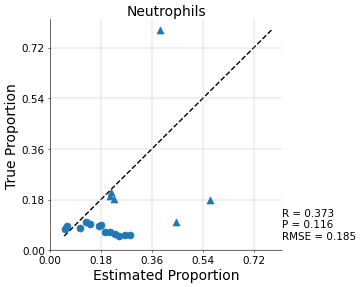

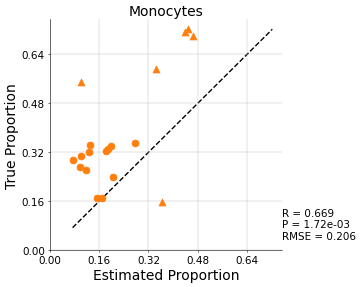

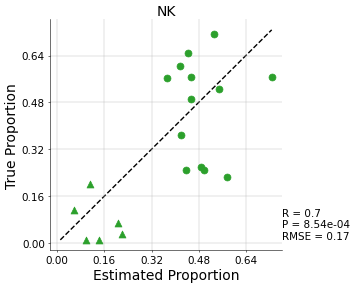

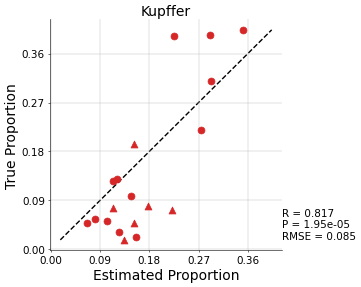

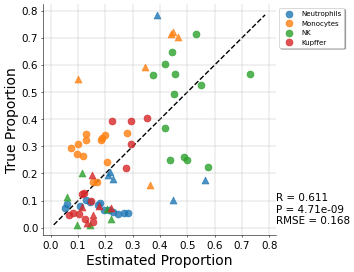

{'Kupffer': [('R', 0.8172), ('P', '1.95e-05'), ('RMSE', 0.0849)],
 'Monocytes': [('R', 0.6694), ('P', '1.72e-03'), ('RMSE', 0.2056)],
 'NK': [('R', 0.6997), ('P', '8.54e-04'), ('RMSE', 0.1699)],
 'Neutrophils': [('R', 0.3731), ('P', 0.116), ('RMSE', 0.185)]}
0.6106


In [3]:
# conduct deconv
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False)

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False,overlap=True)
print(pp.total_cor)

In [4]:
res = pp.merge_total_res[0]
display(res)

,Hepatocyte,Dendritic cell,Hepatoblast,Stem cell,Kupffer cell,Natural killer cell,B cell,Monocyte,Regulatory T (Treg) cell,Hepatic stellate cell,...,Erythroblast,Artery cell,Early erythrocyte,Portal vein cell,Fibroblast,Effector memory T cell,Natural killer T(NKT) cell,Liver sinusoid endothelial cell(LSECs),Macrovascular endothelial cell (MaVECs),Vascular smooth muscle cell(VSMC)
APAP_1,0.040961,0.043319,0.000002,0.009866,0.009009,0.019088,0.005578,0.023591,0.073127,0.033241,...,0.000002,0.001289,0.002575,0.085350,0.009223,0.017158,0.000002,0.010081,0.190212,0.105508
APAP_11,0.041440,0.028131,0.003028,0.024200,0.025712,0.033576,0.019360,0.157280,0.015731,0.099814,...,0.010287,0.005145,0.008774,0.088623,0.024502,0.089833,0.011194,0.006052,0.005447,0.068661
APAP_2,0.095283,0.026372,0.025669,0.030943,0.013364,0.039029,0.066805,0.111808,0.022857,0.076298,...,0.017231,0.026021,0.026724,0.004926,0.015122,0.052038,0.069969,0.017583,0.000004,0.050280
APAP_4,0.092114,0.054871,0.010977,0.032259,0.020620,0.027936,0.032924,0.123371,0.008317,0.074822,...,0.002331,0.029266,0.028933,0.005989,0.028268,0.090119,0.063849,0.014302,0.004659,0.074157
APAP_6,0.099927,0.070018,0.018017,0.034671,0.013938,0.029912,0.062540,0.108423,0.011899,0.068318,...,0.000003,0.063900,0.028893,0.003742,0.028553,0.044187,0.062200,0.028213,0.002383,0.046226
APAP_8,0.034270,0.019452,0.004942,0.023157,0.025009,0.018526,0.002473,0.147876,0.038283,0.079960,...,0.001855,0.003090,0.005251,0.072859,0.031183,0.095395,0.000929,0.005869,0.012043,0.069463
Ctrl_1,0.103443,0.021638,0.012849,0.086879,0.001017,0.033807,0.144007,0.014201,0.015891,0.033807,...,0.078428,0.000003,0.051385,0.002708,0.015215,0.002370,0.157866,0.059498,0.004398,0.007102
Ctrl_10,0.143214,0.042967,0.013590,0.070875,0.058022,0.044803,0.085930,0.009551,0.008817,0.023505,...,0.001840,0.046639,0.043334,0.000004,0.017630,0.001472,0.175896,0.088501,0.009918,0.002207
Ctrl_12,0.140682,0.053243,0.027152,0.080039,0.021863,0.045133,0.091321,0.011286,0.014812,0.031030,...,0.000004,0.061352,0.062057,0.000004,0.014459,0.004234,0.181581,0.060647,0.002824,0.001061
Ctrl_15,0.109548,0.035920,0.023349,0.088717,0.009701,0.062139,0.110985,0.027659,0.022990,0.053160,...,0.005391,0.019398,0.045617,0.000004,0.024067,0.010419,0.145464,0.059624,0.002159,0.006109


***
##### 2. With optimal number of additional topics

  0%|          | 0/10 [00:00<?, ?it/s]

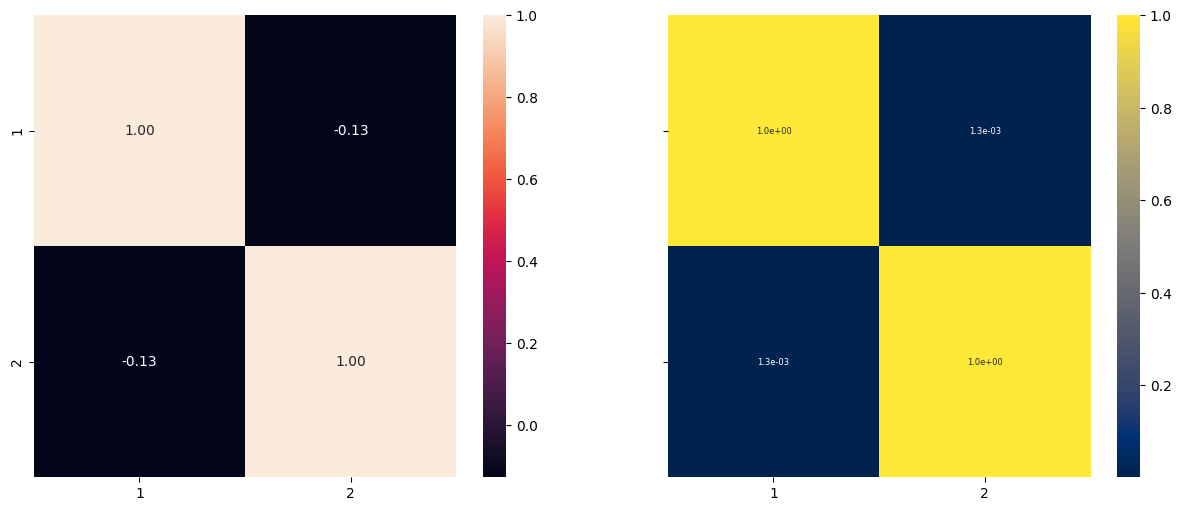

  0%|          | 0/10 [00:00<?, ?it/s]

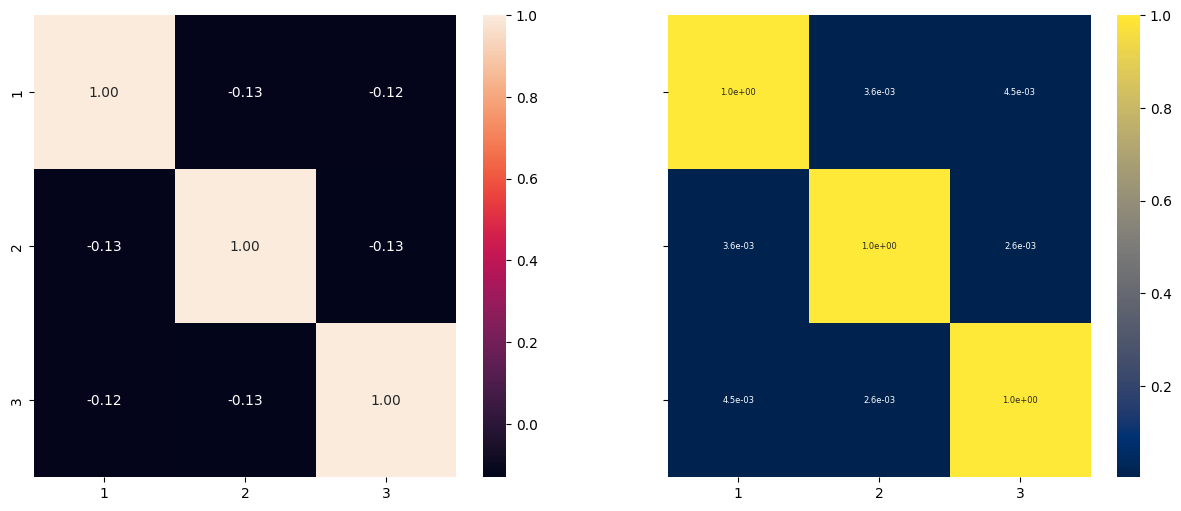

  0%|          | 0/10 [00:00<?, ?it/s]

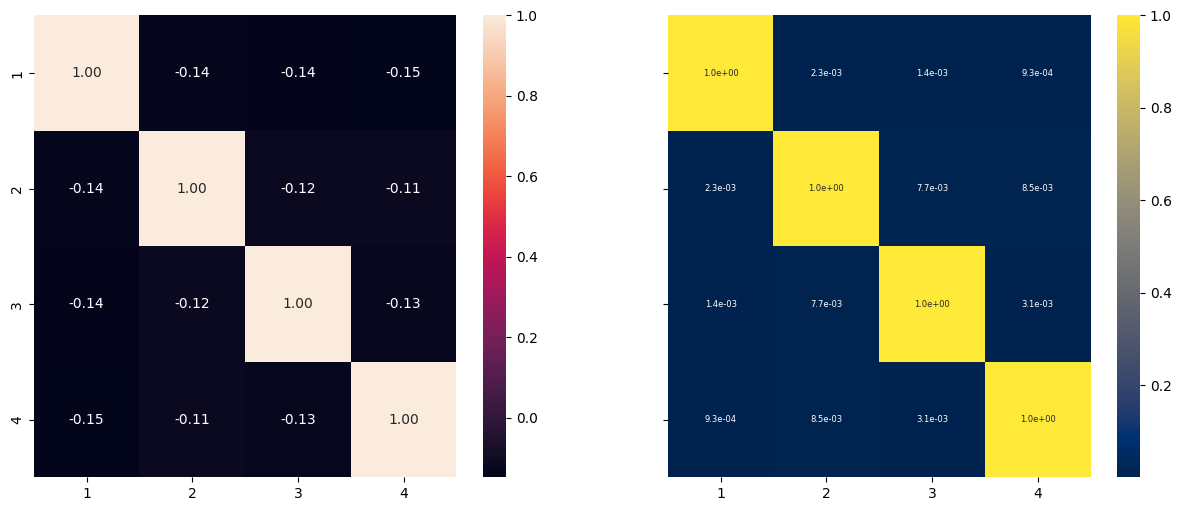

[[True, False], [True, False], [True, False]]
[9, 8, 5]


In [5]:
# detect optimal empty topic number
bool_res = []
p_res = []
for add_topic in range(2,5):
    pp = pipeline.Pipeline(verbose=False)
    pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
    pp.gene_selection(method='CV',outlier=True,topn=1000)
    pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
    pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
    pp.deconv(n=10,add_topic=add_topic,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False)

    overlap,pflag,min_p_list,max_p_list = pp.add_profile_eval(add_topic=add_topic)
    bool_res.append([overlap,pflag])
    p_res.append(max_p_list)
print(bool_res)

sig_number = []
for t in p_res:
    n = sum([i<0.05 for i in t])
    sig_number.append(n)
print(sig_number)

When three topics were added, the topics were independent with an ensemble factor of 8/10; when four were added, the number decreased to 5/10. Based on these results, we can conclude that three additional topics are optimal.


  0%|          | 0/10 [00:00<?, ?it/s]

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


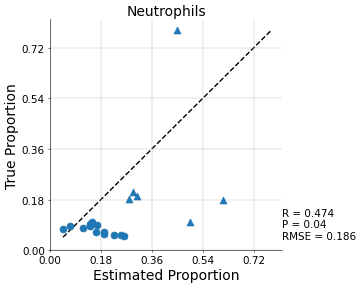

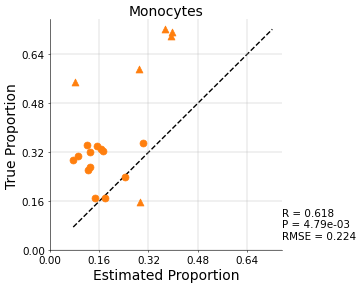

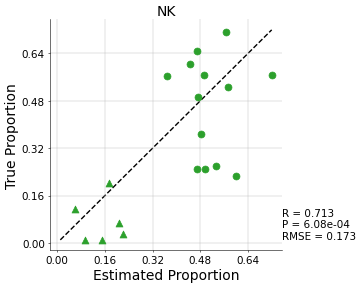

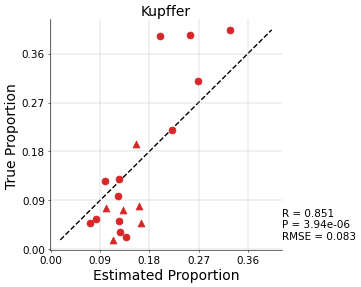

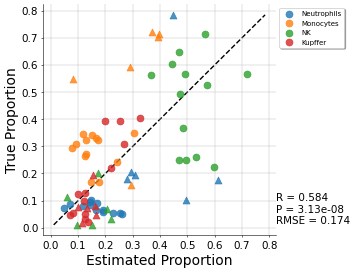

{'Kupffer': [('R', 0.8507), ('P', '3.94e-06'), ('RMSE', 0.0826)],
 'Monocytes': [('R', 0.6181), ('P', '4.79e-03'), ('RMSE', 0.2236)],
 'NK': [('R', 0.7132), ('P', '6.08e-04'), ('RMSE', 0.1729)],
 'Neutrophils': [('R', 0.4738), ('P', 0.04), ('RMSE', 0.1863)]}
0.5837


In [6]:
# single run and eval
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=3,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False) # with the optimized number of additional topics

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False,overlap=True)
print(pp.total_cor)